# A descriptive analysis of the airports dataframe.


In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data=pd.read_csv('airports.csv')
data.head() ## visualisation initiale de la table
country=pd.read_csv('countries.csv')


## DATA CLEANING

In [4]:
data.drop(['wikipedia_link','home_link'],axis=1,inplace=True) ## enlever les colonnes non pertinente
data.set_index('ident',inplace=True) ## mettre l'identifiant en index
data.head() ## visualisation de la table avec les index

,id,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,keywords
ident,,,,,,,,,,,,,,,
00A,6523,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN
00AA,323361,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN
00AK,6524,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN
00AL,6525,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN
00AR,6526,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,00AR


## Conversion de l'altitude en mètres

In [5]:
# convertir elevation en metres
data['elevation_ft']=data['elevation_ft']/3.2808
#change attribut name
data.rename(columns={'elevation_ft':'elevation_m'},inplace=True)
data.head()



,id,type,name,latitude_deg,longitude_deg,elevation_m,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,keywords
ident,,,,,,,,,,,,,,,
00A,6523,heliport,Total Rf Heliport,40.070801,-74.933601,3.352841,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN
00AA,323361,small_airport,Aero B Ranch Airport,38.704022,-101.473911,1047.000732,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN
00AK,6524,small_airport,Lowell Field,59.947733,-151.692524,137.161668,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN
00AL,6525,small_airport,Epps Airpark,34.864799,-86.770302,249.939039,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN
00AR,6526,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,72.238478,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,00AR


In [6]:
print("index is unique ") if data.index.is_unique else print("index is not  (duplicated index )");
## as the united states has too many airports, we will separate it
print(data['iso_country'].value_counts())
US_airports=data[data['iso_country']=='US']
data.drop(US_airports.index,inplace=True)








index is unique 
US    27261
BR     5970
CA     2854
JP     2580
AU     2054
      ...  
CX        1
NU        1
GM        1
NF        1
ZZ        1
Name: iso_country, Length: 244, dtype: int64


<ipython-input-15-9e209280310f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_airports["iso_region"]=US_airports["iso_region"].replace({'US-':''}, regex=True)


Text(0.5, 1.0, 'Number of airports per region in the USA')

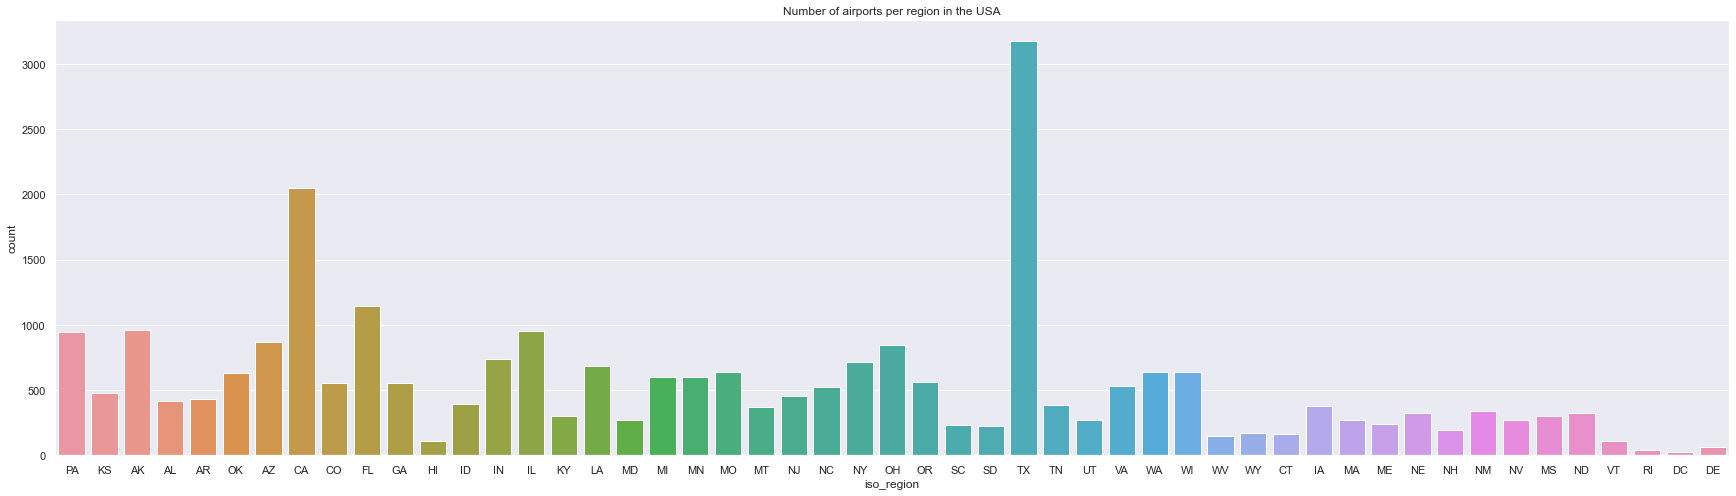

In [15]:
## plot the number of airports per region in the USA
US_airports["iso_region"]=US_airports["iso_region"].replace({'US-':''}, regex=True)
## set figure size
sns.set(rc={'figure.figsize':(30,8)})
## seaborn title
sns.countplot(x='iso_region',data=US_airports).set_title('Number of airports per region in the USA')



In [8]:
## plot the number of airports per country 
data['continent']=data['continent']=data['continent'].fillna('NoA') # for north america

